In [11]:
import pandas as pd
import numpy as np
import math

In [12]:
tasks = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
tasks_time = [45, 11, 9, 50, 15, 12, 12, 12, 12, 8, 9]
tasks_parent = [None, 'A', 'B', None, 'D', 'C', 'C', 'E', 'E', ['F', 'G', 'H', 'I'], 'J']
followers = [6, 5, 4, 5, 4, 2, 2, 2, 2, 1, 0]

In [13]:
dataset = {'Tasks': tasks, 'Tasks Time (s)': tasks_time, 'Tasks that must precede': tasks_parent}

In [14]:
df = pd.DataFrame(data = dataset)

In [15]:
df

,Tasks,Tasks Time (s),Tasks that must precede
0,A,45,None
1,B,11,A
2,C,9,B
3,D,50,None
4,E,15,D
5,F,12,C
6,G,12,C
7,H,12,E
8,I,12,E
9,J,8,"[F, G, H, I]"


In [16]:
__idle__time__original = 0

for i in range(0, len(tasks)):
	__idle__time__original += (50 - df.iloc[i]['Tasks Time (s)'])

In [17]:
import networkx as nx
G = nx.DiGraph()

In [18]:
total_tasks_time = 0

for _, row in df.iterrows():
	# print(row[])
	if row['Tasks that must precede'] is not None:
		if len(row['Tasks that must precede']) > 1:
			for i in row['Tasks that must precede']:
				G.add_edges_from([(i, row['Tasks'])])
		else:
			G.add_edges_from([(row['Tasks that must precede'], row['Tasks'])])

In [19]:
import matplotlib.pyplot as plt

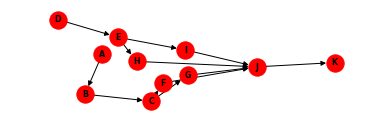

In [20]:
plt.subplot(211)
pos = nx.spring_layout(G, scale = 15)
nx.draw(G, pos, font_size = 8, with_labels=True, font_weight='bold')
plt.savefig('graph.png')
plt.show()

In [21]:
df['Followers'] = followers

In [22]:
df

,Tasks,Tasks Time (s),Tasks that must precede,Followers
0,A,45,None,6
1,B,11,A,5
2,C,9,B,4
3,D,50,None,5
4,E,15,D,4
5,F,12,C,2
6,G,12,C,2
7,H,12,E,2
8,I,12,E,2
9,J,8,"[F, G, H, I]",1


In [23]:
for _, rows in df.iterrows():
	# print(rows['Followers'])
	total_tasks_time += rows['Tasks Time (s)']
print(total_tasks_time)

195


In [24]:
Production_time_per_day = 420 * 60
Wagon_required = 500

CT = Production_time_per_day / Wagon_required
minimum_workstation = math.ceil(total_tasks_time / CT)

print(CT, minimum_workstation)

50.4 4


In [25]:
df_copy = df.copy()
df_copy.sort_values(by = ['Followers', 'Tasks Time (s)'], inplace = True, ascending = False)

print(df_copy)

   Tasks  Tasks Time (s) Tasks that must precede  Followers
0      A              45                    None          6
3      D              50                    None          5
1      B              11                       A          5
4      E              15                       D          4
2      C               9                       B          4
5      F              12                       C          2
6      G              12                       C          2
7      H              12                       E          2
8      I              12                       E          2
9      J               8            [F, G, H, I]          1
10     K               9                       J          0


In [26]:
l = []

cnt = 0

for _, rows in df_copy.iterrows():
	l.append(tuple((rows['Tasks'], rows['Tasks Time (s)'])))

print(l)

a = []
yy = 0

[('A', 45), ('D', 50), ('B', 11), ('E', 15), ('C', 9), ('F', 12), ('G', 12), ('H', 12), ('I', 12), ('J', 8), ('K', 9)]


In [27]:
for i in range(0, len(tasks)):
	# a[i] = l[i]
	if i is not yy:
		continue
	# a.append(tuple((i, l[i])))
	idle_time = CT - l[i][1]
	a.append(tuple((i, l[i], idle_time)))
	# print(idle_time)

	for j in range(i+1, len(tasks)):
		if l[j][1] <= idle_time:
			# print("aaaa ", idle_time)
			# a.append(tuple((i, l[j])))
			idle_time -= l[j][1]
			a.append(tuple((i, l[j], idle_time)))
		else:
			yy = j
			i = j
			break

In [17]:
print(a)

[(0, ('A', 45), 5.399999999999999), (1, ('D', 50), 0.3999999999999986), (2, ('B', 11), 39.4), (2, ('E', 15), 24.4), (2, ('C', 9), 15.399999999999999), (2, ('F', 12), 3.3999999999999986), (6, ('G', 12), 38.4), (6, ('H', 12), 26.4), (6, ('I', 12), 14.399999999999999), (6, ('J', 8), 6.399999999999999), (10, ('K', 9), 41.4)]


In [28]:
column__label = ['Order', 'Tasks Process_Time', 'Idle Time (s)']
df = pd.DataFrame(a, columns = column__label)

In [29]:
df

,Order,Tasks Process_Time,Idle Time (s)
0,0,"(A, 45)",5.4
1,1,"(D, 50)",0.4
2,2,"(B, 11)",39.4
3,2,"(E, 15)",24.4
4,2,"(C, 9)",15.4
5,2,"(F, 12)",3.4
6,6,"(G, 12)",38.4
7,6,"(H, 12)",26.4
8,6,"(I, 12)",14.4
9,6,"(J, 8)",6.4


In [32]:
__idle__time = 0

In [33]:
__idle__time = df.iloc[0]['Idle Time (s)'] + df.iloc[1]['Idle Time (s)'] + df.iloc[5]['Idle Time (s)'] + df.iloc[9]['Idle Time (s)'] + df.iloc[10]['Idle Time (s)']

In [35]:
print("Before Line Balancing idle time is ", __idle__time__original)
print("After Line Balancing idle time is ", __idle__time)

Before Line Balancing idle time is  355
After Line Balancing idle time is  57.0
